In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import RandomState

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
Random_State = 42 #фиксирую зерно случайности

sns.set(style="whitegrid", palette="Set2")
#загружаю и делю данные
DataFrame = pd.read_csv('day.csv')

#преобразую столбец dteday для удобства
DataFrame['dteday'] = pd.to_datetime(DataFrame['dteday'])

LearningPart, TestPart = train_test_split(DataFrame, test_size=0.2, random_state=Random_State)




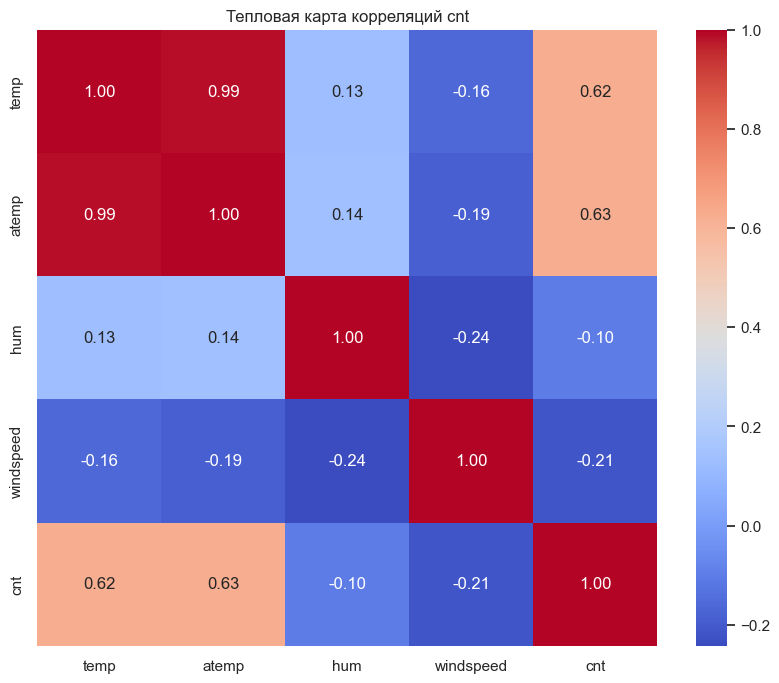

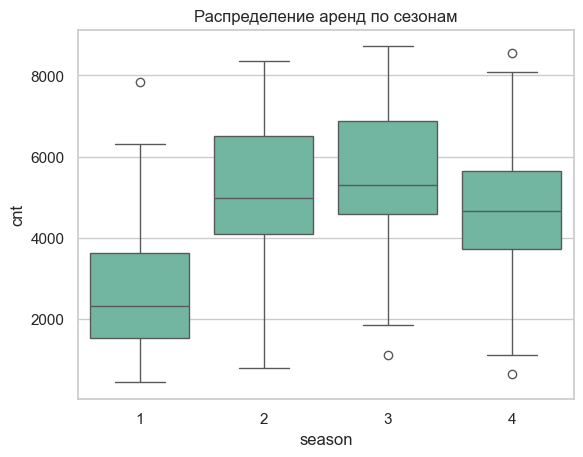

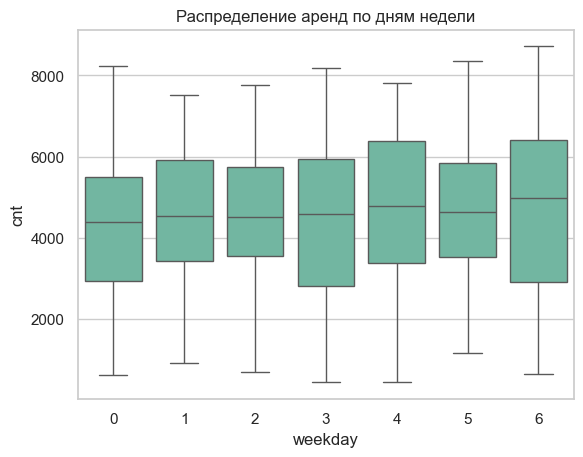

"\nsns.boxplot(x='weathersit', y='cnt', data=LearningPart)\nplt.title('Распределение аренд по выходным')\nplt.show()\n\nsns.boxplot(x='workingday', y='cnt', data=LearningPart)\nplt.title('Распределение аренд по дням рабочим')\nplt.show()\n\nsns.boxplot(x='holiday', y='cnt', data=LearningPart)\nplt.title('Распределение аренд по праздникам')\nplt.show()\n"

In [ ]:
"""
Example1 = LearningPart.groupby('dteday')['cnt'].sum()
plt.figure(figsize=(20, 10))
plt.plot(Example1.index, Example1.values, marker = '.')
plt.show()
Example2 = LearningPart.groupby('dteday')[['temp', 'atemp']].sum()
Example2.plot(
    kind='bar', 
    figsize=(200, 50), 
    width=0.8       
)
plt.show()
Example3 = LearningPart
plt.figure(figsize=(10, 20))
plt.scatter(Example3['weekday'], Example3['cnt'], alpha=0.5)
plt.show()
"""



#casual and redistered - их сумма равна таргету, при обучении модели и тестах использоваться не будут. 
#однако имеет смысл рассмотреть их как target, если они будут иметь более сильную корреляцию с признаками,
# тогда можно будет обучить модель на этих данных, а искомой cnt можно будет предскахать, как их сумму. 

#тепловая карта для всех числовых признаков для cnt
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
corr_matrix = LearningPart[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляций cnt')
plt.show()
"""
# for casual
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual']
corr_matrix = LearningPart[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляций casual')
plt.show()

#for registered
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'registered']
corr_matrix = LearningPart[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляций registered')
plt.show()
"""
"""
по тепловой карте сожно сделать вывод:
1)Со всеми признаками корреляция cnt выше, чем у casual and registered по отдельности -> при обучении и тестировании их использовать не будем 
2) temp и atemp почти совпадают: 0,99, можно использовать только один из этих признаков, высокая положительная корреляция с cnt: 0,62 и 0,63
чем больше температура, тем больше велосипедов берут в аренду. 
3)Слабая отрицательная корреляция с втером и влажностью воздуха: -0,21 и -0,1-> имеет смысл в последствии расмотреть неиспользование этих признаков
"""

"""
Столбчатые диаграммы для категориальных признаков
"""

sns.boxplot(x='season', y='cnt', data=LearningPart)
plt.title('Распределение аренд по сезонам')
plt.show()

sns.boxplot(x='weekday', y='cnt', data=LearningPart)
plt.title('Распределение аренд по дням недели')
plt.show()

"""
sns.boxplot(x='weathersit', y='cnt', data=LearningPart)
plt.title('Распределение аренд по выходным')
plt.show()

sns.boxplot(x='workingday', y='cnt', data=LearningPart)
plt.title('Распределение аренд по дням рабочим')
plt.show()

sns.boxplot(x='holiday', y='cnt', data=LearningPart)
plt.title('Распределение аренд по праздникам')
plt.show()
"""

In [ ]:
"""
Из предыдущих графиков:
больше всего на спрос аренды влияет время года: отношение медиан летом и зимой более чем в два раза, все времена года имеют примерно одинаковые усы,
все кросе весны имеют выбросы - это нужно будет учесть при подготовке данных 

Из признаков будут удалены: atemp, так как почти свопадает temp, а также workingday - вообще никак не связано с cnt, также признаки holiday и weekend - достаточны. 
эти признаки больших выбросов не имеют.
"""

'\nИз предыдущих графиков:\nбольше всего на спрос аренды влияет время года: отношение медиан летом и зимой более чем в два раза, все времена года имеют примерно одинаковые усы,\nвсе кросе весны имеют выбросы - это нужно будет учесть при подготовке данных \n\nИз признаков будут удалены: atemp, так как почти свопадает temp, а также workingday - вообще никак не связано с cnt, также признаки holiday и weekend - достаточны. \nэти признаки больших выбросов не имеют.\n'

In [ ]:
"""
sns.regplot(x='temp', y='cnt', data=LearningPart,
            line_kws={'color': 'red'}, 
            scatter_kws={'alpha': 0.2})
plt.title('Зависимость аренд от температуры')
plt.show()

sns.regplot(x='hum', y='cnt', data=LearningPart,
            line_kws={'color': 'red'}, 
            scatter_kws={'alpha': 0.2})
plt.title('Зависимость аренд от влажности воздуха')
plt.show()

sns.regplot(x='windspeed', y='cnt', data=LearningPart,
            line_kws={'color': 'red'}, 
            scatter_kws={'alpha': 0.2})
plt.title('Зависимость аренд от скорости ветра')
plt.show()
"""


"\nsns.regplot(x='temp', y='cnt', data=LearningPart,\n            line_kws={'color': 'red'}, \n            scatter_kws={'alpha': 0.2})\nplt.title('Зависимость аренд от температуры')\nplt.show()\n\nsns.regplot(x='hum', y='cnt', data=LearningPart,\n            line_kws={'color': 'red'}, \n            scatter_kws={'alpha': 0.2})\nplt.title('Зависимость аренд от влажности воздуха')\nplt.show()\n\nsns.regplot(x='windspeed', y='cnt', data=LearningPart,\n            line_kws={'color': 'red'}, \n            scatter_kws={'alpha': 0.2})\nplt.title('Зависимость аренд от скорости ветра')\nplt.show()\n"

In [ ]:
#удаление неиспользуемых столбцов
LearningPart = LearningPart.drop(columns=['registered', 'workingday', 'casual', 'atemp'])
TestPart = TestPart.drop(columns=['registered', 'workingday', 'casual', 'atemp'])

#удаление выбросов 
lower = LearningPart['cnt'].quantile(0.02)
upper = LearningPart['cnt'].quantile(0.98)
LearningPart = LearningPart[(LearningPart['cnt'] >= lower) & (LearningPart['cnt'] <= upper)]

TestPart = TestPart[(TestPart['cnt'] >= lower) & (TestPart['cnt'] <= upper)]

#Создание нового признака в качестве улучшения - может погода влияет сильнее в разное время года
LearningPart['temp_season'] = LearningPart['temp'] * LearningPart['season']
TestPart['temp_season'] = TestPart['temp'] * TestPart['season']

#преобразование категориальных признаков
LearningPart = pd.get_dummies(LearningPart, columns=['season', 'holiday', 'weathersit'], drop_first=True)
TestPart = pd.get_dummies(TestPart, columns=['season', 'holiday', 'weathersit'], drop_first=True)

#преобразование даты
LearningPart['year'] = LearningPart['dteday'].dt.year          
LearningPart['month'] = LearningPart['dteday'].dt.month       
LearningPart['day'] = LearningPart['dteday'].dt.day 
LearningPart = LearningPart.drop(columns=['dteday', 'mnth', 'yr'])

TestPart['year'] = TestPart['dteday'].dt.year          
TestPart['month'] = TestPart['dteday'].dt.month       
TestPart['day'] = TestPart['dteday'].dt.day 
TestPart = TestPart.drop(columns=['dteday', 'mnth', 'yr'])
#объясняю модели, что это цикличные признаки 
LearningPart['month_sin'] = np.sin(2 * np.pi * LearningPart['month']/12)
LearningPart['month_cos'] = np.cos(2 * np.pi * LearningPart['month']/12)
LearningPart['weekday_sin'] = np.sin(2 * np.pi * LearningPart['weekday']/7)
LearningPart['weekday_cos'] = np.cos(2 * np.pi * LearningPart['weekday']/7)
LearningPart = LearningPart.drop(columns=['month', 'weekday'])

TestPart['month_sin'] = np.sin(2 * np.pi * TestPart['month']/12)
TestPart['month_cos'] = np.cos(2 * np.pi * TestPart['month']/12)
TestPart['weekday_sin'] = np.sin(2 * np.pi * TestPart['weekday']/7)
TestPart['weekday_cos'] = np.cos(2 * np.pi * TestPart['weekday']/7)
TestPart = TestPart.drop(columns=['month', 'weekday'])



In [ ]:
#преобразование вещественных данных
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
LearningPart[['temp', 'hum', 'windspeed', 'temp_season']] = scaler.fit_transform(LearningPart[['temp', 'hum', 'windspeed', 'temp_season']])

TestPart[['temp', 'hum', 'windspeed', 'temp_season']] = scaler.transform(TestPart[['temp', 'hum', 'windspeed', 'temp_season']])

In [ ]:
Y_data_train = LearningPart['cnt']
X_data_train = LearningPart.drop(columns=['instant', 'cnt'])

Y_data_test = TestPart['cnt']
X_data_test = TestPart.drop(columns=['instant', 'cnt'])

reg = LinearRegression()
reg.fit(X_data_train, Y_data_train)

#свободный коэффициент
intercept = reg.intercept_
print(f"\n{intercept:.4f}")

#коэффициенты для признаков
coefficients = reg.coef_
coef = pd.DataFrame(coefficients, index=X_data_train.columns, columns=['Coefficient'])

print(coef.sort_values(by='Coefficient', ascending=False))


-3880416.6117
              Coefficient
year          1931.084796
season_4      1679.768343
season_2      1077.049531
temp          1004.875226
season_3       672.785852
day             -5.168277
weekday_sin    -38.821245
hum           -139.960271
month_cos     -157.748860
weekday_cos   -178.369604
windspeed     -200.894655
month_sin     -247.740454
temp_season   -275.377717
weathersit_2  -463.390844
holiday_1     -534.934428
weathersit_3 -1697.444668


In [ ]:
#в тестовой части выыбросы удалены раньше
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error, mean_absolute_percentage_error
predictions = reg.predict(X_data_test) # предсказали
mae = mean_absolute_error(Y_data_test, predictions)
rmse = root_mean_squared_error(Y_data_test, predictions)
mape = mean_absolute_percentage_error(Y_data_test, predictions) * 100

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f} %")


MAE:  561.46
RMSE: 727.88
MAPE: 16.69 %


In [ ]:
#градиентный бустинг от СAT
import lightgbm as lgb

gb_reg = lgb.LGBMRegressor(n_estimators=153, learning_rate=0.1, random_state=42)
gb_reg.fit(X_data_train, Y_data_train)

predictions_gb = gb_reg.predict(X_data_test)

mae = mean_absolute_error(Y_data_test, predictions_gb)
rmse = root_mean_squared_error(Y_data_test, predictions_gb)
mape = mean_absolute_percentage_error(Y_data_test, predictions_gb) * 100

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f} %")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 822
[LightGBM] [Info] Number of data points in the train set: 560, number of used features: 14
[LightGBM] [Info] Start training from score 4565.700000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,